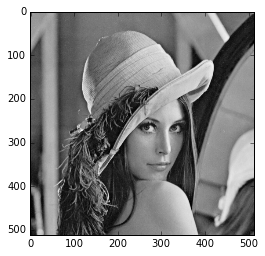

In [3]:
import pywt
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline  


img = scipy.misc.lena()
img=img.astype(float)

plt.figure()
plt.imshow(img)
plt.gray()
plt.show()

$$c = \sqrt{a^2 + b^2}$$

ah
av
ad
aa
aah
aav
aad
aaa
aaah
aaav
aaad
aaaa
aaaah
aaaav
aaaad
aaaaa
aaaaah
aaaaav
aaaaad
aaaaaa
aaaaaah
aaaaaav
aaaaaad
aaaaaaa
aaaaaaah
aaaaaaav
aaaaaaad
aaaaaaaa
aaaaaaaah
aaaaaaaav
aaaaaaaad
aaaaaaaaa


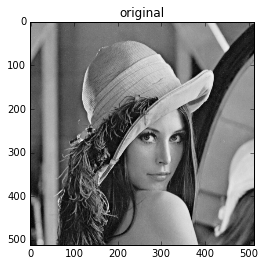

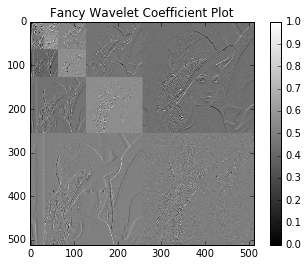

In [7]:
wp =pywt.WaveletPacket2D(data=img,wavelet="db1",mode="sym")
rows=img.shape[0]
cols=img.shape[1]

z=np.zeros([rows,cols])
r0=0
r1=rows/2
r2=rows
c0=0
c1=cols/2
c2=cols
count=0

sh='h'
sv='v'
sd='d'
sa='a'
ohshitcounter=0
while count<wp.maxlevel-1:
  ch=wp[sh].data
  cv=wp[sv].data
  cd=wp[sd].data
  ca=wp[sa].data

  # normalize for visual effects at each scale 
  hmax=np.amax(ch)
  hmin=np.amin(ch)
  vmax=np.amax(cv)
  vmin=np.amin(cv)
  dmax=np.amax(cd)
  dmin=np.amin(cd)
  Amax=np.amax(ca)
  Amin=np.amin(ca)

  if (hmax-hmin)==0:
    ohshitcounter=ohshitcounter+1
    print ohshitcounter
    print 'count'
    print count 

  ch=(ch-hmin)/(hmax-hmin)
  cv=(cv-vmin)/(vmax-vmin)
  cd=(cd-dmin)/(dmax-dmin)
  ca=(ca-Amin)/(Amax-Amin)

  # get coefficients
  z[r0:r1,c1:c2]=ch
  z[r1:r2,c0:c1]=cv
  z[r1:r2,c1:c2]=cd
  z[r0:r1,c0:c1]=ca
  
  # update reference indices
  r2=r1
  r1=r1/2
  c2=c1
  c1=c1/2

  # update paths for wavelet packet 
  count=count+1
  sh=sa+'h'
  sv=sa+'v'
  sd=sa+'d'
  sa=sa+'a'
  print sh
  print sv
  print sd  
  print sa

# plot
plt.figure()
plt.imshow(img)
plt.title('original')
plt.show()

plt.figure()
plt.imshow(z)
plt.title('Fancy Wavelet Coefficient Plot')
plt.colorbar()
plt.show()